# Natural Language and Image Processing: Homework 1
prepared by *Marina Talianskaia*

You should build full ML pipeline and get best AUC.

Important stages in pipeline:

1. Feature selection
2. Cross validation
3. Hyper parameters tuning
4. Compare minimum 2 models

# Dowloadling libraries

In [80]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import sklearn.metrics as metrics

from scipy.stats import randint as sp_randint
from time import time

from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import grid_search

from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Data reading and description

In [2]:
data = pd.read_csv('C:\\For Python\dataset_simple.csv')

In [15]:
data.shape

(9999, 1001)

In [14]:
data.head(7)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999,label
0,-0.272674,0.801643,-0.650531,0.952486,-0.153037,0.427145,-1.085534,1.318513,0.002588,-1.849832,...,-0.572848,-0.448690,0.073369,-0.845503,-1.074903,0.222103,-1.024658,-0.711647,0.036411,1
1,0.201004,-0.263537,-0.793137,-4.483672,0.745123,1.156577,0.351558,1.735511,-1.490988,-0.327063,...,1.045496,1.494638,-0.776573,-1.219524,-0.756398,-0.963046,0.488610,0.313609,-0.490794,0
2,-1.834495,-0.305209,0.053789,4.448289,1.294481,1.241900,-1.358354,-0.211469,-0.186544,0.964812,...,0.917945,0.920003,0.690022,-0.834381,-0.261806,-0.061880,-1.177730,-1.345305,-0.085971,0
3,-0.484526,0.473056,-0.345463,-7.375136,-0.817676,-0.778446,0.909734,-0.677147,-1.913900,-0.087426,...,0.598949,0.078195,0.024128,1.308711,0.943230,0.903181,0.501013,2.639802,1.540640,1
4,-0.032351,0.247055,-0.351119,-2.669246,-1.068889,0.322954,1.101136,1.817973,0.944537,0.406005,...,-0.851188,1.272217,0.172442,-0.509007,0.357073,0.523263,0.965078,0.297335,0.088714,1
5,0.611700,-0.244822,0.583607,1.503404,-0.104725,0.943069,1.826918,-0.694449,-0.113367,0.909642,...,0.441221,-1.386731,2.167706,0.143728,-0.031690,-0.710304,-0.406994,1.284103,0.398134,1
6,-0.683728,0.624575,-2.098098,14.415604,0.089336,0.591611,0.292786,0.853558,2.063484,-1.549264,...,1.298536,0.848869,-2.538228,1.595099,-0.365556,2.755379,-1.017768,-0.028076,0.098568,0


In [9]:
data.groupby('label').size()

label
0    5068
1    4931
dtype: int64

In [11]:
data.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999,label
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,-0.004460,-0.013556,-0.003732,-0.526323,0.005371,-0.008539,0.017156,-0.001695,0.016588,-0.011591,...,0.004245,0.004588,0.000104,-0.004114,-0.015524,0.003792,-0.012826,-0.000154,0.008867,0.493149
std,0.991939,1.004086,1.004643,5.892651,0.995250,1.001142,0.995826,1.000576,1.016175,0.994338,...,1.010292,0.996613,0.984661,1.005568,1.000405,0.992878,0.986676,1.003824,0.992667,0.499978
min,-3.769974,-3.617617,-3.753391,-21.830355,-3.952088,-4.302776,-3.693491,-3.769295,-3.582291,-3.964497,...,-3.543944,-3.702521,-3.645616,-3.757164,-3.998032,-3.844831,-4.314576,-3.912707,-3.852604,0.000000
25%,-0.667193,-0.702984,-0.666734,-4.535838,-0.664072,-0.676919,-0.657419,-0.678497,-0.670545,-0.696125,...,-0.686178,-0.674913,-0.663270,-0.676386,-0.690162,-0.660690,-0.671733,-0.689658,-0.653306,0.000000
50%,0.006990,-0.019359,0.002527,-0.596745,0.008596,-0.014751,0.023373,-0.005377,0.007411,-0.023052,...,-0.002653,0.000651,-0.005459,-0.002117,-0.017218,0.005911,-0.009118,0.024641,-0.002785,0.000000
75%,0.655618,0.667009,0.660033,3.367154,0.672424,0.662462,0.697545,0.662622,0.720524,0.668373,...,0.682821,0.680257,0.668761,0.675716,0.660026,0.680975,0.647070,0.674688,0.677321,1.000000
max,3.629974,4.437563,3.724971,20.021875,3.444207,3.502859,3.925565,4.069058,5.209648,3.871048,...,3.616481,4.456758,3.727838,3.959971,3.520052,4.305980,3.671758,3.555786,3.574397,1.000000


As we can see, we have a dataset of 9999 observations with 1000 features, dataset consists of two classes with appproximately the same size, so, we don't face the sample imbalance problem.

# Feature seletion

In [17]:
X, y = data.drop('label', axis = 1), data['label']

In [20]:
# Scaling 
sc = StandardScaler()
sc.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

## Tree-based feature selection

In [33]:
clf = ExtraTreesClassifier(n_estimators=300)
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new_2 = model.transform(X)
X_new_2.shape

(9999, 111)

## L1-based feature selection

In [31]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(9999, 483)

As the PCA method I get used to for dimension reduction totally failed, I tried approaches recommended by the lecturer, among them the Tree-based feature selection (FS) and L-1 based FS seemed to be applicable for presented dataset. After applying both of them I stopped at the first one. The parametres applied is the consensus between representativity and computative power of hardware.

# Applying different classifiers with default parameters

In [45]:
#Splitting data on test and training samples
data_tr, data_t, y_tr, y_t = train_test_split (X_new_2, y, test_size=0.25, random_state=123)

### Model performance function

In [49]:
def model_performance(model_name, X_tr, y_tr, y_te, y_pred):
    print('Model name: %s'%model_name)
    print('Test accuracy (Accuracy Score): %f'%metrics.accuracy_score(y_te, y_pred))
    print('Test accuracy (ROC AUC Score): %f'%metrics.roc_auc_score(y_te, y_pred))
    print('Test precision 0: %f'%metrics.precision_score(y_te, y_pred, pos_label=0))   
    print('Test precision 1: %f'%metrics.precision_score(y_te, y_pred, pos_label=1)) 
    print('Test recall 0: %f'%metrics.recall_score(y_te, y_pred, pos_label=0))   
    print('Test recall 1: %f'%metrics.recall_score(y_te, y_pred, pos_label=1))

    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_te, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

    # making the graph
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

##Logistic regression

In [46]:
class_LogR = LogisticRegression()
class_LogR.fit(data_tr, y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Model name: Logistic Regression
Test accuracy (Accuracy Score): 0.839200
Test accuracy (ROC AUC Score): 0.839092
Test precision 0: 0.846154
Test precision 1: 0.831822
Test recall 0: 0.842227
Test recall 1: 0.835957


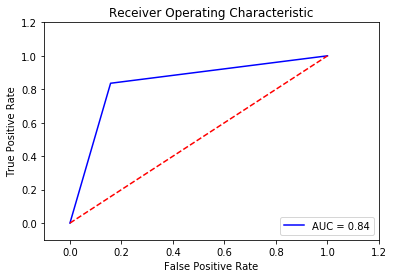

In [52]:
y_pred_LogR = class_LogR.predict(data_t)
model_performance('Logistic Regression', X_tr=data_tr, y_tr=y_train, y_te=y_t, y_pred=y_pred_LogR)

##Desicion Tree

In [54]:
class_DT = DecisionTreeClassifier()
class_DT.fit(data_tr, y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Model name: Decision tree classifier
Test accuracy (Accuracy Score): 0.660000
Test accuracy (ROC AUC Score): 0.659790
Test precision 0: 0.673182
Test precision 1: 0.646192
Test recall 0: 0.665893
Test recall 1: 0.653687


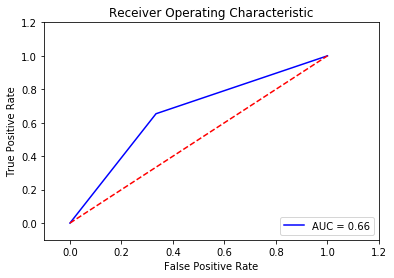

In [55]:
y_pred_DT = class_DT.predict(data_t)
model_performance('Decision tree classifier', X_tr=data_tr, y_tr=y_train, y_te=y_t, y_pred=y_pred_DT)

In [56]:
class_RF = RandomForestClassifier()
class_RF.fit(data_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Model name: Random forest classifier
Test accuracy (Accuracy Score): 0.782400
Test accuracy (ROC AUC Score): 0.779222
Test precision 0: 0.748837
Test precision 1: 0.833166
Test recall 0: 0.871616
Test recall 1: 0.686827


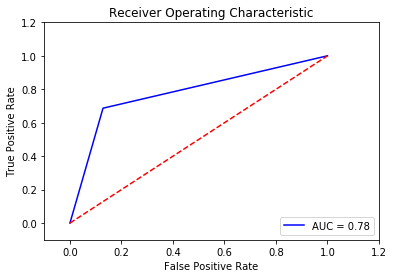

In [58]:
y_pred_RF = class_RF.predict(data_t)
model_performance('Random forest classifier', X_tr=data_tr, y_tr=y_train, y_te=y_t, y_pred=y_pred_RF)

## Gaussian Naive Bayes

In [62]:
class_GNB = GaussianNB()
class_GNB.fit(data_tr, y_tr)

GaussianNB(priors=None)

Model name: GaussianNB
Test accuracy (Accuracy Score): 0.822400
Test accuracy (ROC AUC Score): 0.822355
Test precision 0: 0.831382
Test precision 1: 0.812961
Test recall 0: 0.823666
Test recall 1: 0.821044


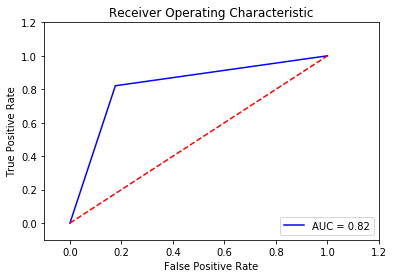

In [63]:
y_pred_GNB = class_GNB.predict(data_t)
model_performance('GaussianNB', X_tr=data_tr, y_tr=y_train, y_te=y_t, y_pred=y_pred_GNB)

## Gradient Boosting

In [65]:
class_GB = GradientBoostingClassifier().fit(data_tr, y_tr)
class_GB.fit(data_tr, y_tr)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

Model name: GradientBoostingClassifier
Test accuracy (Accuracy Score): 0.864000
Test accuracy (ROC AUC Score): 0.863756
Test precision 0: 0.866821
Test precision 1: 0.860949
Test recall 0: 0.870843
Test recall 1: 0.856669


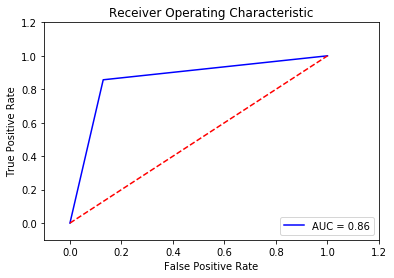

In [66]:
y_pred_GB = class_GB.predict(data_t)
model_performance('GradientBoostingClassifier', X_tr=data_tr, y_tr=y_train, y_te=y_t, y_pred=y_pred_GB)

## Linear models with stochastic gradient descent (SGD) learning

In [68]:
class_SGDC = SGDClassifier()
class_SGDC.fit(data_tr, y_tr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

Model name: SGDClassifier
Test accuracy (Accuracy Score): 0.782400
Test accuracy (ROC AUC Score): 0.783134
Test precision 0: 0.806716
Test precision 1: 0.759187
Test recall 0: 0.761794
Test recall 1: 0.804474


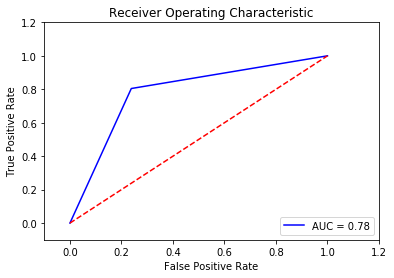

In [69]:
y_pred_SGDC = class_SGDC.predict(data_t)
model_performance('SGDClassifier', X_tr=data_tr, y_tr=y_train, y_te=y_t, y_pred=y_pred_SGDC)

## Multi-layer Perceptron

In [71]:
class_MLP = MLPClassifier()
class_MLP.fit(data_tr, y_tr)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Model name: MLPClassifier
Test accuracy (Accuracy Score): 0.782400
Test accuracy (ROC AUC Score): 0.783134
Test precision 0: 0.806716
Test precision 1: 0.759187
Test recall 0: 0.761794
Test recall 1: 0.804474


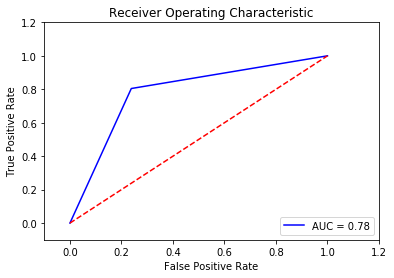

In [72]:
y_pred_MLP = class_MLP.predict(data_t)
model_performance('MLPClassifier', X_tr=data_tr, y_tr=y_train, y_te=y_t, y_pred=y_pred_SGDC)

After applying several classifiers with default parameters I decided to drop DT classifier as it presented lower level of accuracy.
The best classifier with the defaulf parameters are gradient boosting and log-regression which performed over 84% under AUC-metric.

# Cross-validation

In [74]:
def cross_val_results(model_name, model, X, y, cv):
    scores = cross_validate(model, X, y, cv=cv, scoring=('roc_auc'))
    print('Model name: %s'%model_name)
    print('------------------------------')
    print("AUC scores", scores['test_score'].round(4))
    # with 95% confidence interval
    print("AUC 95 prc confidence interval: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2))
    print('______________________________')
    print(" ")

In [75]:
cross_val_results('Logistic regression', class_LogR, X_new_2, y, cv=5)
cross_val_results('SGDClassifier', class_SGDC, X_new_2, y, cv=5)
cross_val_results('Random Forest classifier', class_RF, X_new_2, y, cv=5)
cross_val_results('Gradient Tree Boosting', class_GB, X_new_2, y, cv=5)
cross_val_results('Multi-layer Perceptron', class_MLP, X_new_2, y, cv=5)
cross_val_results('GaussianNB', class_GNB, X_new_2, y, cv=5)

Model name: Logistic regression
------------------------------
AUC scores [0.9106 0.9213 0.9096 0.9219 0.9077]
AUC 95 prc confidence interval: 0.91 (+/- 0.01)
______________________________
 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

Model name: SGDClassifier
------------------------------
AUC scores [0.838  0.8542 0.8503 0.882  0.8225]
AUC 95 prc confidence interval: 0.85 (+/- 0.04)
______________________________
 
Model name: Random Forest classifier
------------------------------
AUC scores [0.8329 0.8474 0.839  0.8365 0.8551]
AUC 95 prc confidence interval: 0.84 (+/- 0.02)
______________________________
 
Model name: Gradient Tree Boosting
------------------------------
AUC scores [0.9321 0.9443 0.9359 0.941  0.9352]
AUC 95 prc confidence interval: 0.94 (+/- 0.01)
______________________________
 
Model name: Multi-layer Perceptron
------------------------------
AUC scores [0.9912 0.9929 0.9864 0.991  0.9904]
AUC 95 prc confidence interval: 0.99 (+/- 0.00)
______________________________
 
Model name: GaussianNB
------------------------------
AUC scores [0.8892 0.8899 0.8931 0.9038 0.8979]
AUC 95 prc confidence interval: 0.89 (+/- 0.01)
______________________________
 


For futher consideration and tuning I decided to take those models which represented the quality over 90% under AUC-metric as follows (from the worst to the best):

- Logistic regression
- Gradient Tree Boosting
- Multi-layer Perceptron


# Model tuning

## Log-regression

In [97]:
param_grid_LR = {"penalty": ['l2','l1'],
              "C": [0.001, 1.0, 1000]}

In [98]:
tunning_LR = grid_search.GridSearchCV(class_LogR, param_grid_LR, scoring = 'roc_auc', cv = 5)
tunning_LR.fit(data_tr, y_tr)


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2', 'l1'], 'C': [0.001, 1.0, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [99]:
tunning_LR.best_estimator_

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [101]:
print("Chosen parameters:" ,tunning_LR.best_params_)
print("AUC score:",tunning_LR.best_score_)

Chosen parameters: {'C': 0.001, 'penalty': 'l2'}
AUC score: 0.9124231823862048


## Gradient Tree Boosting

In [122]:
param_grid_GB = {"loss": ['deviance', 'exponential'],
              "n_estimators" : [10, 100],
              "max_features": [None, 25]}

In [123]:
tunning_GB = grid_search.GridSearchCV(class_GB, param_grid_GB, scoring = 'roc_auc', cv = 5)
tunning_GB.fit(data_tr, y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'loss': ['deviance', 'exponential'], 'n_estimators': [10, 100], 'max_features': [None, 25]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [124]:
tunning_GB.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [125]:
print("Chosen parameters:" ,tunning_GB.best_params_)
print("AUC score:",tunning_GB.best_score_)

Chosen parameters: {'loss': 'deviance', 'max_features': None, 'n_estimators': 100}
AUC score: 0.9323129009869313


## MLP

In [139]:
param_grid_MLP = {"activation": ['identity','logistic', 'tanh', 'relu'],
              "solver": ['lbfgs', 'sgd', 'adam'],
              "learning_rate_init": [0.01, 0.0001]}

In [140]:
tunning_MLP = grid_search.GridSearchCV(class_MLP, param_grid_MLP, scoring = 'roc_auc', cv = 5)
tunning_MLP.fit(data_tr, y_tr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'], 'learning_rate_init': [0.01, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [141]:
tunning_MLP.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [142]:
print("Chosen parameters:" ,tunning_MLP.best_params_)
print("AUC score:",tunning_MLP.best_score_)

Chosen parameters: {'activation': 'relu', 'learning_rate_init': 0.01, 'solver': 'adam'}
AUC score: 0.9897337900424678


Comment: there are a number of parameters that also could be changed to increase the model performance (for example, learning rate in Gradient Boosting Classifier or Hidden layer size in MLP-model), however, the computation of such parameters is rather time consuming, so, mostly only easily computating parameters have been used.

# Conclusions: model comparison

We tried to build our ideal model applying the following classifiers:
- Logistic regression
- Gradient Tree Boosting
- Multi-layer Perceptron
- Decision Tree
- Random Forest
- Gaussian Naive Bayes

After several stages of selection we stopped ar three models: ANN MLP, Log-regression and Gradien Tree Boosting, all of them represent good results (over 0.91 accuracy rate) after cross-validation even with the defaulf settings.
Comparing tree models after tuning, we can conclude that the best model is Multi-layer Perceptron ANN, its the AUC reuslt is more around 99% (almost a perfect one) and the best parameters are 'activation': 'relu', 'learning_rate_init': 0.01, 'solver': 'adam', but we should notice that training of these model was rather time and resource consuming and the defauls setting with same level accuracy would be more preferable.